In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

## Problem 2

### (f)

In [12]:
pB = pd.read_csv("predictBinary.csv")

In [13]:
def p(theta, x):
    return (np.exp(x * theta))/(1 + np.exp(x * theta))

In [14]:
def s(theta, y, x):
    return x * (y - p(theta, x))

In [15]:
def s_prime(theta, x):
    return x**2 * (p(theta, x)**2 - p(theta, x))

In [16]:
th_i = 0
th_j = th_j = th_i - pB.apply(lambda row: s(th_i, row['Y'], row['X']), axis=1).sum() / pB.apply(lambda row: s_prime(th_i, row['X']), axis=1).sum()

while (np.abs(th_i - th_j) > 0.000005):
    print(th_i)
    th_i = th_j
    th_j = th_i - pB.apply(lambda row: s(th_i, row['Y'], row['X']), axis=1).sum() / pB.apply(lambda row: s_prime(th_i, row['X']), axis=1).sum()

print(th_j)

th_hat = th_j

0
0.5752882477762631
0.8947622752243818
1.0404841055665974
1.062731510210272
1.063163176275159


### (g)

In [17]:
def p_hat(x):
    return np.exp(th_hat * x) / (1 + np.exp(th_hat * x))

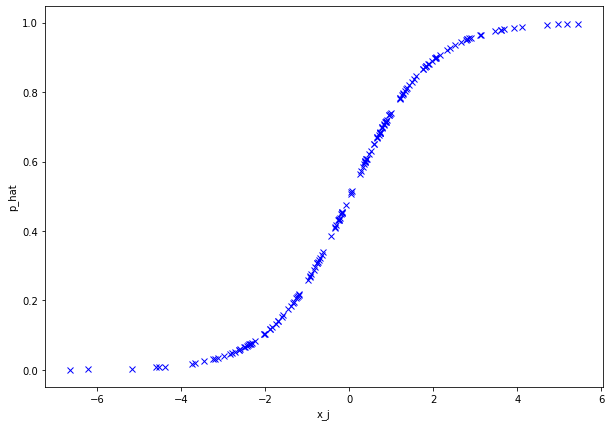

In [18]:
plt.plot(pB.X, p_hat(pB.X), 'bx')
plt.xlabel("x_j")
plt.ylabel("p_hat")
plt.savefig("2g.png")
plt.show()

### (h)

In [19]:
s_prime = pB.apply(lambda row: row['X']**2 * (p_hat(row['X'])**2 - p_hat(row['X'])), axis=1).sum()
np.sqrt(1 / (len(pB.index) * -s_prime))

0.0131782701372763

## Problem 3

### (a)

In [20]:
sp500 = pd.read_csv("SP500time.csv")
sp500.rename(columns={'Unnamed: 0': "x", "Y": "y"}, inplace=True)
sp500.head()

,x,y
0,1,-1.839181
1,2,-0.950855
2,3,1.230799
3,4,1.743554
4,5,-0.807826


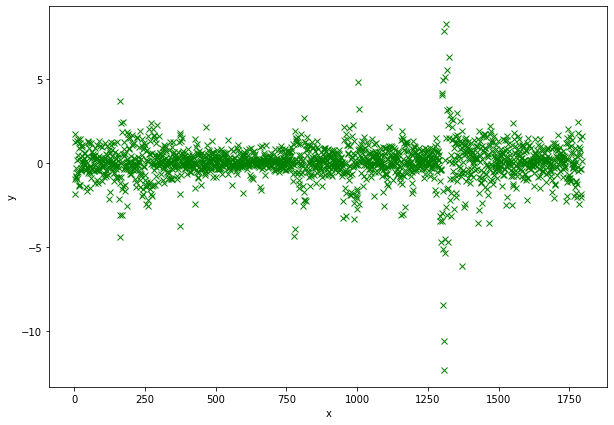

In [21]:
plt.plot(sp500.x, sp500.y, 'gx')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("3a.png")
plt.show()

### (b) (ii)

In [22]:
def logL(theta):
    n = len(sp500.index)
    s = 0
    sigma_j = 1
    for j in range(1, n):
        sigma_j = np.sqrt(theta * sigma_j**2 + (1 - theta) * (sp500.iloc[j-1,1])**2)
        s += -1 * sp500.iat[j,1]**2 / (2 * sigma_j**2) - np.log(sigma_j)
    return s

In [23]:
sp500.iloc[0,1]

-1.83918100591778

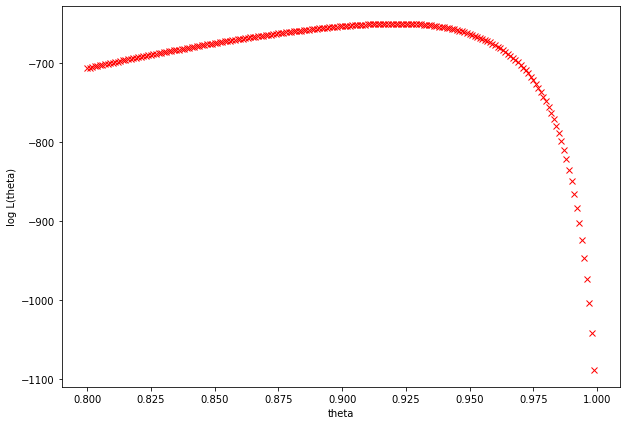

In [24]:
theta_range = np.arange(0.8,1.0,0.001)

plt.plot(theta_range, logL(theta_range), 'rx')
plt.xlabel('theta')
plt.ylabel('log L(theta)')
plt.savefig("3b2.png")
plt.show()

### (b) (iii)

In [25]:
from scipy.optimize import minimize

In [33]:
theta_hat = minimize(lambda x: -1 * logL(x), [0.8], bounds=[[0.001,0.999]]).x[0]
theta_hat

0.9209776156354059

### (c) (i)

In [27]:
n = len(sp500.index)
sigma_seq = np.zeros([n])
sigma_seq[0] = 1

In [28]:
for i in range(1,n): 
    sigma_seq[i] = theta_hat * sigma_seq[i-1] + (1 - theta_hat) * sp500.iloc[i-1,1]**2

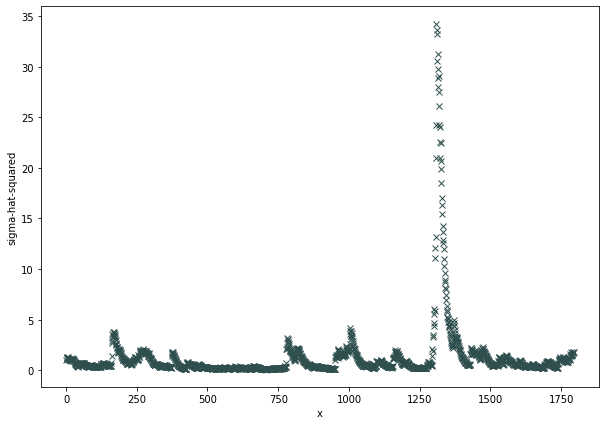

In [29]:
plt.plot(sp500.x, sigma_seq, color="darkslategray", marker="x", linestyle="none")
plt.xlabel('x')
plt.ylabel('sigma-hat-squared')
plt.savefig("3c1.png")
plt.show()

### (c) (ii)

In [30]:
sigma = pd.Series(sigma_seq).apply(np.sqrt)
quantiles = pd.Series([0.01,0.5,0.99])
quantiles.apply(lambda x: sigma.quantile(x))

0    0.306121
1    0.749933
2    4.546710
dtype: float64

### (c) (iii)

In [31]:
uj = np.array([sp500.iloc[i,1] / sigma.iloc[i] for i in range(n)])

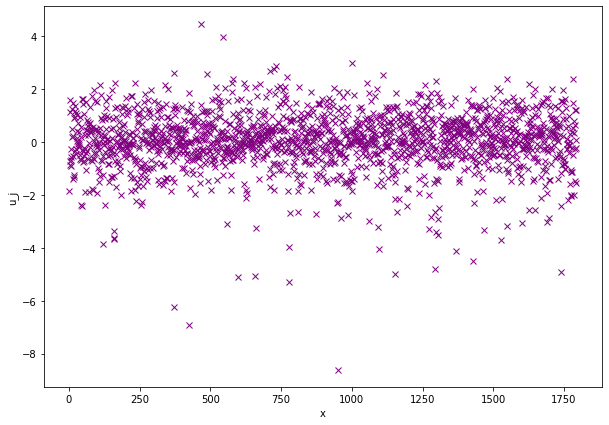

In [32]:
plt.plot(sp500.x, uj, marker="x", color="purple", linestyle="none")
plt.xlabel("x")
plt.ylabel("u_j")
plt.savefig("3c3.png")
plt.show()